##Importing Library

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats #For statistical test
from datetime import datetime, timedelta

pd.set_option('display.max_rows', None)



##Load ESV Data

####After casting it from .txt to .json to .csv file

In [9]:
esv = pd.read_csv("/content/ESVData.csv")
esv.head(5)

<ipython-input-9-efbf687387f2>:1: DtypeWarning: Columns (8,39,68,95,122,150) have mixed types. Specify dtype option on import or set low_memory=False.
  esv = pd.read_csv("/content/ESVData.csv")


,15m_DECLINING_LTP,15m_DECLINING_OI,15m_DECLINING_RSI,15m_DECLINING_VOLUME,15m_EMA20D200,15m_EMA20D50,15m_EMA50D200,15m_LtpChg,15m_N50_OI_PGL,15m_N50_PGL,...,W_PGL,W_RISING_LTP,W_RISING_OI,W_RISING_RSI,W_RISING_VOLUME,W_VOL_PGL,W_VolChg,W_per_volume_change,W_perc_chg,_id_$oid
0,False,True,False,False,NaN,1.56,NaN,-0.24,NaN,,...,Top_20G,True,True,True,False,,-33.46,-33.46,9.75,63ce5220c928edf59bf5578e
1,False,False,False,False,NaN,1.18,NaN,0.10,NaN,,...,Top_10G,True,True,True,False,,-15.52,-15.52,11.48,63ce5220c928edf59bf5578e
2,False,False,False,False,NaN,0.69,NaN,-0.02,NaN,,...,Top_20G,True,True,True,True,,4.96,4.96,12.85,63ce5220c928edf59bf5578e
3,False,False,False,False,NaN,-0.48,NaN,0.29,NaN,,...,,False,True,False,False,Top_20G,-18.47,-18.47,-2.74,63ce5220c928edf59bf5578e
4,False,False,False,False,NaN,-0.50,NaN,0.01,NaN,,...,,False,True,False,True,,21.40,21.40,-2.81,63ce5220c928edf59bf5578e


 #### We need only some coloumn from ESV

In [10]:
# prompt: D_PDEMA20 , DateTime_$date,STOCK , need only these coloumn from esv datafram

esv = esv[['D_PDEMA20', 'DateTime_$date', 'STOCK']]


#### change into Data Format From String

In [11]:


# Convert 'DateTime_$date' to datetime objects if it's not already
esv['DateTime_$date'] = pd.to_datetime(esv['DateTime_$date'])

# Extract the date part
esv['Date'] = esv['DateTime_$date'].dt.date

# Remove the original DateTime_$date column (optional)
esv = esv.drop('DateTime_$date', axis=1)

esv.tail(5)


,D_PDEMA20,STOCK,Date
67724,-1.45,NIFTY OIL AND GAS,2023-08-25
67725,-1.42,NIFTY OIL AND GAS,2023-08-28
67726,-1.12,NIFTY OIL AND GAS,2023-08-29
67727,-1.33,NIFTY OIL AND GAS,2023-08-30
67728,-2.10,NIFTY OIL AND GAS,2023-08-31


In [12]:
esv.isnull().sum()

,0
D_PDEMA20,4733
STOCK,0
Date,0


In [13]:
esv.shape

(67729, 3)

##Load Hover Data

In [14]:
hover = pd.read_csv("/content/HoverData.csv")
hover.head(5)

,15m_BELCO,15m_BELPVT,15m_BLPVT,15m_BULCO,15m_InOutEdge,15m_MACD,15m_MCO,15m_MCo,15m_MP20,15m_MP200,...,W_RSI C,W_RSI DC,W_RSI KC,W_RSI KCD,W_RSI KD,W_open_equals_high,W_open_equals_low,W_per_volume_change,W_perc_chg,_id_$oid
0,NaN,NaN,NaN,NaN,NaN,BLW BUCO,NaN,15mBECO,15mPB20,15mPB200,...,B40,B20,B20,NaN,KBD,False,False,-41.01,-2.68,63d7462f5450af6f6de16a49
1,NaN,NaN,NaN,NaN,NaN,ABV BUCO,NaN,15mBUCO,15mPA20,15mPB200,...,B40,B20,B20,NaN,KBD,False,False,-1.87,1.12,63d7462f5450af6f6de16a49
2,NaN,NaN,NaN,NaN,NaN,ABV BECO,NaN,15mBUCO,15mPB20,15mPB200,...,B40,B20,B20,NaN,KBD,False,False,23.11,0.18,63d7462f5450af6f6de16a49
3,NaN,NaN,NaN,NaN,P15mL,BLW BUCO,NaN,15mBECO,15mPB20,15mPB200,...,B40,B20,B20,NaN,KBD,False,False,-86.66,-2.39,63d7462f5450af6f6de16a49
4,BELCO,NaN,NaN,NaN,P15mL,BLW BUCO,NaN,15mBECO,15mPB20,15mPB200,...,B40,B20,B20,NaN,KBD,False,False,-73.34,-3.89,63d7462f5450af6f6de16a49


In [15]:
# prompt: DateTime_$date , STOCK , D_RSI, M_RSI , W_RSI,H_MP50,H_MCo,D_MP200,D_MP50, i NEED ONLY THESE COLOUM FROM HOVER DATAFRAME AND DATE CHANGE INTO DATA FORMAT

hover = hover[['DateTime_$date', 'STOCK', 'D_RSI', 'M_RSI', 'W_RSI', 'H_MP50', 'H_MCo', 'D_MP200', 'D_MP50','DEFAULT_LTP']]

# Convert 'DateTime_$date' to datetime objects if it's not already
hover['DateTime_$date'] = pd.to_datetime(hover['DateTime_$date'])

# Extract the date part
hover['Date'] = hover['DateTime_$date'].dt.date

# Remove the original DateTime_$date column
hover = hover.drop('DateTime_$date', axis=1)

hover.head(5)


,STOCK,D_RSI,M_RSI,W_RSI,H_MP50,H_MCo,D_MP200,D_MP50,DEFAULT_LTP,Date
0,BSE,27.32,47.79,31.16,HPB50,HBECO,DPB200,DPB50,486.70,2023-02-08
1,BSE,41.71,49.12,34.43,HPA50,HBECO,DPB200,DPB50,505.70,2023-02-09
2,BSE,39.62,48.78,33.15,HPA50,HBECO,DPB200,DPB50,501.00,2023-02-10
3,BSE,34.84,47.95,31.47,HPB50,HBECO,DPB200,DPB50,489.05,2023-02-13
4,BSE,32.20,47.44,30.49,HPB50,HBECO,DPB200,DPB50,481.50,2023-02-14


In [16]:
hover.shape

(64298, 10)

##Merge ESV and Hover with key Stock and Date as Inner Join

In [17]:


# Merge the two dataframes based on 'STOCK' and 'DateTime_$date' columns
merged_df = pd.merge(esv, hover, on=['STOCK', 'Date'], how='inner')

nifty = merged_df[merged_df['STOCK'] == "NIFTY 50"]

nifty.head(5)


,D_PDEMA20,STOCK,Date,D_RSI,M_RSI,W_RSI,H_MP50,H_MCo,D_MP200,D_MP50,DEFAULT_LTP
60722,0.05,NIFTY 50,2023-02-08,48.63,60.04,51.86,HPA50,HBUCO,DPA200,DPB50,17871.70
60723,0.16,NIFTY 50,2023-02-09,49.45,60.15,52.18,HPA50,HBUCO,DPA200,DPB50,17893.45
60724,-0.04,NIFTY 50,2023-02-10,48.05,59.97,51.64,HPA50,HBUCO,DPA200,DPB50,17856.50
60725,-0.48,NIFTY 50,2023-02-13,44.86,59.54,50.24,HPB50,HBUCO,DPA200,DPB50,17770.90
60726,0.38,NIFTY 50,2023-02-14,51.31,60.33,52.77,HPA50,HBUCO,DPA200,DPB50,17929.80


In [18]:
merged_df.duplicated().sum()

np.int64(4666)

In [19]:
merged_df.shape

(64784, 11)

In [20]:
merged_df = merged_df.drop_duplicates()

In [21]:
merged_df.shape

(60118, 11)

##Stock Selection

#### Determine the number of stocks to purchase based on the investing
amount, considering the following conditions:

● If the investment amount is between ₹500 and ₹50,000, purchase 3 stocks.

● If the investment amount is between ₹50,001 and ₹1,000,000, purchase 4 stocks.

● Otherwise, purchase 5 stocks(max)

In [22]:
def determine_num_stocks(investment_amount):
    """Determines the number of stocks to purchase based on the investment amount."""
    if 500 <= investment_amount <= 50000:
        return 3
    elif 50001 <= investment_amount <= 1000000:
        return 4
    else:
        return 5 #Max stocks


##Investment Amount Capping

###Why Divide Equally?

The purpose of this initial division is to:

Risk Mitigation: It prevents from concentrating  entire investment in a single stock, which can be risky.

Diversification (Basic): It provides a basic level of diversification by spreading investment across multiple stocks.

While simple, it might not be optimal. A more flexible approach involves assigning weights to each stock based on analysis, potentially considering risk factors or using optimization algorithms. Justification is important when using weighting schemes. A weighting scheme can allow you invest more than 90% in a particular stock. Weighted portfolios will need rebalancing. Ultimately, you can modify and allow for a portfolio that is more aggressive.


In [23]:
def calculate_max_investment_per_stock(investment_amount, num_stocks):
    """Calculates the maximum amount to invest in each stock."""
    return investment_amount / num_stocks


##Filtering_Condition

In [24]:
# Filter conditions for stocks
filter_conditions = (
    (merged_df['D_MP200'] == 'DPA200') &           # Condition 1
    (merged_df['D_MP50'] == 'DPA50') &             # Condition 2
    (merged_df['D_RSI'] > 60) &                    # Condition 3
    (merged_df['D_RSI'] < 85) &                    # Condition 4
    (merged_df['M_RSI'] > 40) &                    # Condition 5
    (merged_df['W_RSI'] > 40) &                    # Condition 6
    (merged_df['H_MP50'] == 'HPA50') &             # Condition 7
    (merged_df['H_MCo'] == 'HBUCO') &              # Condition 8
    (merged_df['D_PDEMA20'] > -2) &                # Condition 9
    (merged_df['D_PDEMA20'] < 2)                   # Condition 10
)

# Apply the filters
filtered_df = merged_df[filter_conditions].copy()


In [25]:
filtered_df.tail(5)

,D_PDEMA20,STOCK,Date,D_RSI,M_RSI,W_RSI,H_MP50,H_MCo,D_MP200,D_MP50,DEFAULT_LTP
64633,1.99,NIFTY PSU BANK,2023-08-17,60.49,69.10,64.84,HPA50,HBUCO,DPA200,DPA50,4593.45
64644,1.57,NIFTY HEALTHCARE,2023-05-30,64.56,54.61,58.42,HPA50,HBUCO,DPA200,DPA50,8149.45
64652,1.86,NIFTY HEALTHCARE,2023-06-09,66.89,57.28,63.80,HPA50,HBUCO,DPA200,DPA50,8365.40
64707,0.85,NIFTY HEALTHCARE,2023-08-23,60.68,68.70,79.79,HPA50,HBUCO,DPA200,DPA50,9621.65
64761,1.72,NIFTY OIL AND GAS,2023-08-01,64.75,58.98,62.81,HPA50,HBUCO,DPA200,DPA50,8110.35


##Stock Sorting and Top Stock Selection
 #### Sort the filtered stocks based on Daily PDEMA20 and Daily RSI

  #### Select the top-performing stocks from the filtered list on a given date

In [26]:
# Sort by Daily PDEMA20 (ascending) and Daily RSI (descending)
filtered_df = filtered_df.sort_values(by=['D_PDEMA20', 'D_RSI'],
                                    ascending=[True, False])

# Select top stocks based on investment bracket
investment_amount = 75000  # Replace with actual input
if 500 <= investment_amount <= 50000:
    top_stocks = filtered_df.head(3)
elif 50001 <= investment_amount <= 1000000:
    top_stocks = filtered_df.head(4)
else:
    top_stocks = filtered_df.head(5)



In [27]:
 top_stocks

,D_PDEMA20,STOCK,Date,D_RSI,M_RSI,W_RSI,H_MP50,H_MCo,D_MP200,D_MP50,DEFAULT_LTP
57754,-0.23,VAIBHAVGBL,2023-07-17,71.51,45.56,58.55,HPA50,HBUCO,DPA200,DPA50,330.00
61770,0.75,NIFTY INFRA,2023-06-01,60.71,64.12,62.49,HPA50,HBUCO,DPA200,DPA50,5446.75
39353,0.77,NESTLEIND,2023-05-31,60.28,65.06,67.53,HPA50,HBUCO,DPA200,DPA50,21673.10
60796,0.84,NIFTY 50,2023-06-15,62.41,63.76,63.87,HPA50,HBUCO,DPA200,DPA50,18688.05


##Portfolio Churning

####Calculate daily portfolio volatility on an aggregate level (sum of all stocks) and plot it against the Nifty index. Utilize statistical tests to analyze portfolio performance.  Plot this volatility against the Nifty index to assess portfolio risk.


To calculate daily portfolio volatility and compare it with the Nifty index, follow these steps:

Daily Portfolio Value Calculation: Compute the daily value of the portfolio by summing the value of all stocks (price × shares) for each day. This provides a time series of portfolio values.

Daily Returns Calculation: Calculate daily returns as the percentage change in portfolio value. This helps measure daily performance.

Volatility Calculation: Compute rolling volatility (standard deviation of returns) over a specified window (e.g., 5 days) and annualize it. Volatility measures risk.

Nifty Comparison: Extract Nifty index data, calculate its daily returns, and compute its volatility similarly.

Statistical Tests: Perform correlation, t-tests, and F-tests to compare portfolio and Nifty returns, assessing performance and risk-adjusted metrics like Sharpe ratio.

Visualization: Plot portfolio and Nifty volatility over time to visually assess risk and performance.

 This analysis helps evaluate portfolio risk relative to the market.




In [28]:
import pandas as pd
from datetime import datetime, timedelta


# Step 2: Determine the number of stocks to purchase
def determine_num_stocks(investment_amount):
    """Determines the number of stocks to purchase based on the investment amount."""
    if 500 <= investment_amount <= 50000:
        return 3
    elif 50001 <= investment_amount <= 1000000:
        return 4
    else:
        return 5  # Max stocks

# Step 3: Calculate maximum investment per stock
def calculate_max_investment_per_stock(investment_amount, num_stocks):
    """Calculates the maximum amount to invest in each stock."""
    return investment_amount / num_stocks

# Step 4: Filter conditions for stocks
def filter_stocks(df):
    """Filters stocks based on the given conditions."""
    filter_conditions = (
        (df['D_MP200'] == 'DPA200') &  # Condition 1
        (df['D_MP50'] == 'DPA50') &  # Condition 2
        (df['D_RSI'] > 60) &  # Condition 3
        (df['D_RSI'] < 85) &  # Condition 4
        (df['M_RSI'] > 40) &  # Condition 5
        (df['W_RSI'] > 40) &  # Condition 6
        (df['H_MP50'] == 'HPA50') &  # Condition 7
        (df['H_MCo'] == 'HBUCO') &  # Condition 8
        (df['D_PDEMA20'] > -2) &  # Condition 9
        (df['D_PDEMA20'] < 2)  # Condition 10
    )
    return df[filter_conditions].copy()

# Step 5: Sort filtered stocks
def sort_stocks(filtered_df):
    """Sorts stocks by Daily PDEMA20 (ascending) and Daily RSI (descending)."""
    return filtered_df.sort_values(by=['D_PDEMA20', 'D_RSI'], ascending=[True, False])

# Step 6: Select top-performing stocks
def select_top_stocks(sorted_df, num_stocks):
    """Selects the top-performing stocks based on the number of stocks to purchase."""
    return sorted_df.head(num_stocks)

# Function to calculate shares to buy for each stock
def calculate_shares(price, max_investment_per_stock):
    """Calculate the number of shares to buy based on price and max investment."""
    if price <= 0:
        return 0
    return int(max_investment_per_stock / price)  # Integer number of shares

# Function to calculate P&L
def calculate_pnl(current_portfolio, current_prices):
    """
    Calculates profit and loss for the current basket.

    Args:
        current_portfolio: Dict with {stock: {'price': buy_price, 'shares': num_shares}}
        current_prices: Dict with {stock: current_price}

    Returns:
        Dict with {stock: profit_or_loss}
    """
    pnl = {}
    for stock, details in current_portfolio.items():
        buy_price = details['price']
        shares = details['shares']

        if stock in current_prices:
            sell_price = current_prices[stock]
            pnl[stock] = (sell_price - buy_price) * shares
        else:
            # If stock price not available, assume no change
            pnl[stock] = 0

    return pnl

# Main execution
# Initialize variables
merged_df['Date'] = pd.to_datetime(merged_df['Date'])  # Convert 'Date' column to datetime



investment_amount = 500000  # Example investment amount




num_stocks = determine_num_stocks(investment_amount)

max_investment_per_stock = calculate_max_investment_per_stock(investment_amount, num_stocks)

# Initialize portfolio tracking
portfolio = {}  # Will store {stock: {'price': buy_price, 'shares': num_shares}}
total_profit = 0

# Simulate monthly churning
start_date = datetime(2023, 2, 8)  # Start from feb 2023
end_date = datetime(2023, 8, 31)    # End in August 2023
current_date = start_date

while current_date < end_date:
    print(f"\nProcessing month: {current_date.strftime('%Y-%m')}")

    # Get the last date of the current month
    if current_date.month == 12:
        month_end = datetime(current_date.year + 1, 1, 1) - timedelta(days=1)
    else:
        month_end = datetime(current_date.year, current_date.month + 1, 1) - timedelta(days=1)

    # Filter stocks for the current month (ensure we get the complete month's data)
    monthly_data = merged_df[(merged_df['Date'].dt.year == current_date.year) &
                            (merged_df['Date'].dt.month == current_date.month)]

    # Check if we have data for this month
    if monthly_data.empty:
        print(f"No data available for {current_date.strftime('%Y-%m')}. Skipping to next month.")
        current_date = (month_end + timedelta(days=1))
        continue

    # Get the latest data for each stock in the month (for end-of-month value)
    latest_stock_data = monthly_data.loc[monthly_data.groupby('STOCK')['Date'].idxmax()]

    # Get current prices for all stocks at end of month
    current_prices = {row['STOCK']: row['DEFAULT_LTP'] for _, row in latest_stock_data.iterrows()}

    # Step 4: Filter stocks based on criteria
    filtered_stocks = filter_stocks(monthly_data)

    # Step 5: Sort filtered stocks
    sorted_stocks = sort_stocks(filtered_stocks)

    # Step 6: Select top-performing stocks
    available_num_stocks = min(num_stocks, len(sorted_stocks))
    if available_num_stocks < num_stocks:
        print(f"Warning: Only {available_num_stocks} stocks meet the criteria. Adjusting number of stocks.")

    top_stocks = select_top_stocks(sorted_stocks, available_num_stocks)

    # Step 7: Calculate P&L for current portfolio
    month_profit = 0
    if portfolio:
        pnl = calculate_pnl(portfolio, current_prices)
        print("P&L for current basket:")
        for stock, profit in pnl.items():
            print(f"  {stock}: ₹{profit:.2f}")

        month_profit = sum(pnl.values())
        total_profit += month_profit
        print(f"Month profit: ₹{month_profit:.2f}")
    else:
        print("No portfolio to sell (first iteration).")

    # Clear current portfolio
    portfolio = {}

    # Build new portfolio
    print("New portfolio:")
    for _, row in top_stocks.iterrows():
        stock = row['STOCK']
        price = row['DEFAULT_LTP']

        # Calculate shares to buy
        shares = calculate_shares(price, max_investment_per_stock)
        actual_investment = shares * price

        portfolio[stock] = {
            'price': price,
            'shares': shares,
            'investment': actual_investment
        }

        print(f"  {stock}: {shares} shares at ₹{price:.2f} (₹{actual_investment:.2f})")

    # Calculate final portfolio value
    portfolio_value = sum(details['shares'] * details['price'] for stock, details in portfolio.items())
    print(f"Final portfolio value at the end of {current_date.strftime('%Y-%m')}: ₹{portfolio_value:.2f}")

    # Display total profit till now
    print(f"Total profit till now: ₹{total_profit:.2f}")

    # Move to the next month
    current_date = (month_end + timedelta(days=1))


Processing month: 2023-02
No portfolio to sell (first iteration).
New portfolio:
  GODREJCP: 132 shares at ₹940.40 (₹124132.80)
  ONGC: 806 shares at ₹155.00 (₹124930.00)
  NIFTY AUTO: 9 shares at ₹13257.35 (₹119316.15)
  SUNDARMFIN: 53 shares at ₹2343.75 (₹124218.75)
Final portfolio value at the end of 2023-02: ₹492597.70
Total profit till now: ₹0.00

Processing month: 2023-03
P&L for current basket:
  GODREJCP: ₹3663.00
  ONGC: ₹-3183.70
  NIFTY AUTO: ₹-9121.95
  SUNDARMFIN: ₹-2345.25
Month profit: ₹-10987.90
New portfolio:
  BOSCHLTD: 6 shares at ₹18452.65 (₹110715.90)
  SIEMENS: 37 shares at ₹3327.15 (₹123104.55)
  NIFTY FMCG: 2 shares at ₹45904.90 (₹91809.80)
  BOSCHLTD: 6 shares at ₹18532.20 (₹111193.20)
Final portfolio value at the end of 2023-03: ₹326107.55
Total profit till now: ₹-10987.90

Processing month: 2023-04
P&L for current basket:
  BOSCHLTD: ₹5037.60
  SIEMENS: ₹4530.65
  NIFTY FMCG: ₹3818.40
Month profit: ₹13386.65
New portfolio:
  NIFTY FMCG: 2 shares at ₹46421.45

##Volatility Calculation

#### Calculate daily portfolio volatility on an aggregate level (sum of all
stocks) and plot it against the Nifty index. Utilize statistical tests to analyze portfolio
performance.  Plot this volatility against the Nifty index to assess portfolio risk.


===== Executing Step 8: Volatility Analysis vs Nifty =====


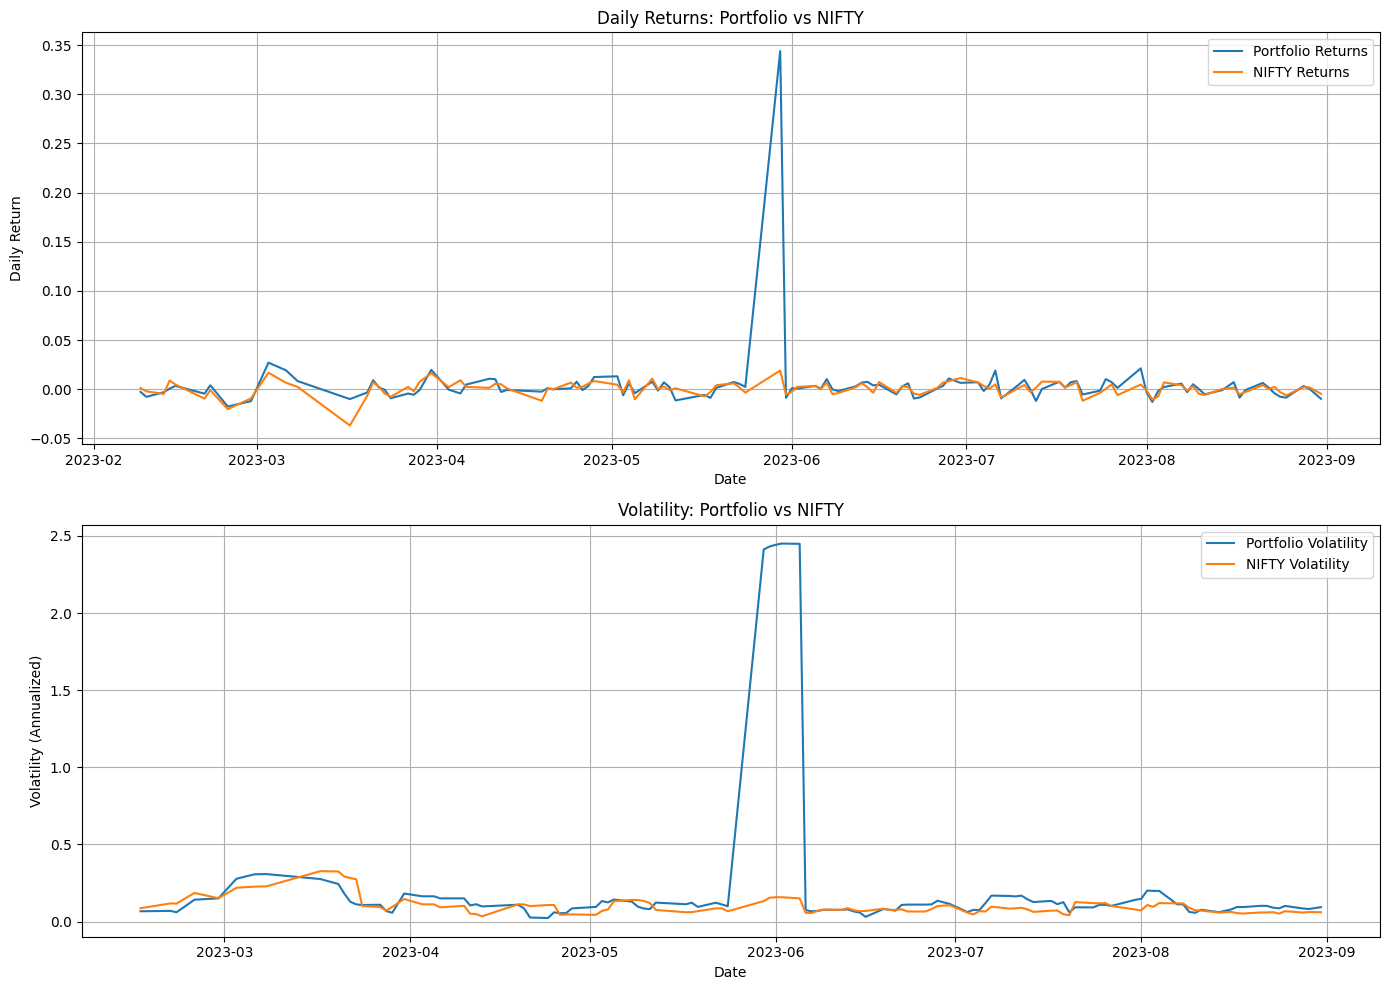


==== Statistical Analysis Results ====
Correlation between Portfolio and Nifty returns: 0.3898
P-value for correlation: 0.0000
There is a statistically significant correlation between portfolio and Nifty returns

T-statistic for paired sample test: 1.2708
P-value for t-test: 0.2064
There is no statistically significant difference between portfolio and Nifty returns

F-statistic (variance ratio): 21.2272
Portfolio has higher variance (more volatile) than Nifty

Sharpe ratio - Portfolio: 1.9828
Sharpe ratio - Nifty: 1.0495
Portfolio has better risk-adjusted returns than Nifty


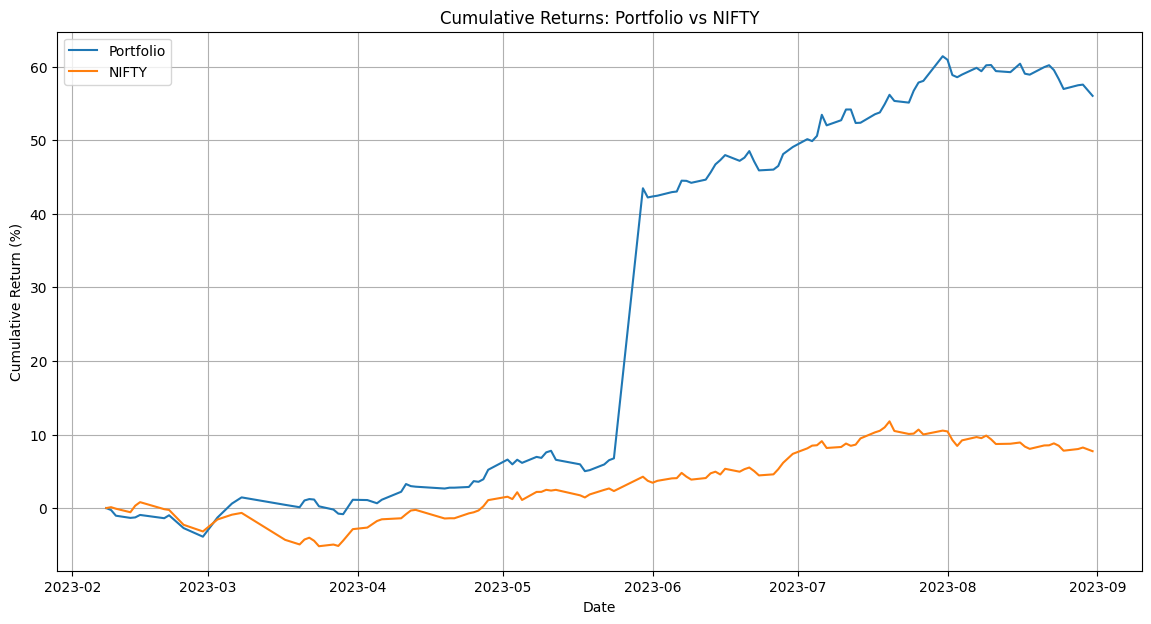


Portfolio Beta: 1.8116
Portfolio is more volatile than the market (aggressive)

==== Summary Statistics ====
Average Portfolio Volatility: 0.2162
Average NIFTY Volatility: 0.1001
Maximum Portfolio Drawdown: -3.89%
Maximum NIFTY Drawdown: -5.19%
Final Portfolio Return: 56.04%
Final NIFTY Return: 7.73%

Portfolio Outperformance vs NIFTY: 48.30%
🔼 Portfolio OUTPERFORMED the market


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime, timedelta

# Function to calculate daily portfolio value
def calculate_daily_portfolio_value(merged_df, portfolio):
    """
    Calculates the daily portfolio value based on the holdings and daily stock prices.

    Args:
        merged_df: DataFrame containing daily stock data
        portfolio: Dictionary of stocks and their purchase prices

    Returns:
        DataFrame with daily portfolio values
    """
    # Create a new DataFrame to store daily portfolio values
    portfolio_stocks = list(portfolio.keys())

    # Filter the merged_df to include only portfolio stocks
    portfolio_df = merged_df[merged_df['STOCK'].isin(portfolio_stocks)].copy()

    # Pivot the data to get daily prices for each stock
    daily_prices = portfolio_df.pivot_table(
        index='Date',
        columns='STOCK',
        values='DEFAULT_LTP',
        aggfunc='last'  # Take the last value if there are multiple values for a day
    ).reset_index()

    # Calculate daily portfolio value (sum of all stock prices)
    for stock in portfolio_stocks:
        if stock in daily_prices.columns:
            daily_prices[f'{stock}_value'] = daily_prices[stock]

    # Sum up the values for all stocks to get total portfolio value
    value_columns = [f'{stock}_value' for stock in portfolio_stocks if f'{stock}_value' in daily_prices.columns]
    daily_prices['Portfolio_Value'] = daily_prices[value_columns].sum(axis=1)

    return daily_prices[['Date', 'Portfolio_Value']]

# Function to calculate volatility
def calculate_volatility(returns, window=5):
    """
    Calculates rolling volatility of returns

    Args:
        returns: Series of returns
        window: Rolling window size for volatility calculation

    Returns:
        Series of volatility values
    """
    return returns.rolling(window=window).std() * np.sqrt(252)  # Annualized volatility

# Function to perform statistical tests
def perform_statistical_tests(portfolio_returns, nifty_returns):
    """
    Performs various statistical tests to compare portfolio returns with Nifty returns

    Args:
        portfolio_returns: Series of portfolio returns
        nifty_returns: Series of Nifty returns

    Returns:
        Dictionary containing test results
    """
    # Remove NaN values
    clean_data = pd.DataFrame({
        'Portfolio': portfolio_returns,
        'Nifty': nifty_returns
    }).dropna()

    if len(clean_data) < 2:
        print("Warning: Not enough data points for statistical tests")
        return {
            'correlation': np.nan,
            'p_value_correlation': np.nan,
            't_statistic': np.nan,
            'p_value_ttest': np.nan,
            'f_statistic': np.nan,
            'portfolio_sharpe': np.nan,
            'nifty_sharpe': np.nan
        }

    # 1. Correlation test
    correlation, p_value = stats.pearsonr(clean_data['Portfolio'], clean_data['Nifty'])

    # 2. t-test for paired samples (to compare means)
    t_stat, p_value_ttest = stats.ttest_rel(clean_data['Portfolio'], clean_data['Nifty'])

    # 3. F-test for variance comparison
    f_stat = np.var(clean_data['Portfolio']) / np.var(clean_data['Nifty'])

    # 4. Sharpe ratio (using 5% as risk-free rate)
    risk_free_rate = 0.05 / 252  # Daily risk-free rate
    portfolio_sharpe = (clean_data['Portfolio'].mean() - risk_free_rate) / clean_data['Portfolio'].std() * np.sqrt(252)
    nifty_sharpe = (clean_data['Nifty'].mean() - risk_free_rate) / clean_data['Nifty'].std() * np.sqrt(252)

    return {
        'correlation': correlation,
        'p_value_correlation': p_value,
        't_statistic': t_stat,
        'p_value_ttest': p_value_ttest,
        'f_statistic': f_stat,
        'portfolio_sharpe': portfolio_sharpe,
        'nifty_sharpe': nifty_sharpe
    }

# Main function to analyze portfolio volatility
def analyze_portfolio_volatility(merged_df, portfolio, start_date, end_date):
    """
    Analyzes portfolio volatility and compares it to Nifty index

    Args:
        merged_df: DataFrame containing stock data
        portfolio: Dictionary of stocks and their purchase prices
        start_date: Start date for analysis
        end_date: End date for analysis

    Returns:
        DataFrame with analysis results
    """
    # 1. Extract Nifty data from merged_df
    nifty_df = merged_df[merged_df['STOCK'] == 'NIFTY 50'].copy()

    # Check if we have Nifty data available
    if nifty_df.empty:
        print("Error: No Nifty 50 data found in the merged dataframe")
        return None

    # Keep only relevant columns
    nifty_df = nifty_df[['Date', 'DEFAULT_LTP']].rename(columns={'DEFAULT_LTP': 'NIFTY'})

    # 2. Calculate daily portfolio value
    portfolio_values = calculate_daily_portfolio_value(merged_df, portfolio)

    # 3. Merge portfolio values with Nifty data
    combined_df = pd.merge(portfolio_values, nifty_df, on='Date', how='inner')

    # Check if we have enough data after merging
    if len(combined_df) < 2:
        print("Error: Not enough data points after merging portfolio and Nifty data")
        return None

    # 4. Calculate daily returns
    combined_df['Portfolio_Return'] = combined_df['Portfolio_Value'].pct_change()
    combined_df['NIFTY_Return'] = combined_df['NIFTY'].pct_change()

    # 5. Calculate rolling volatility
    combined_df['Portfolio_Volatility'] = calculate_volatility(combined_df['Portfolio_Return'])
    combined_df['NIFTY_Volatility'] = calculate_volatility(combined_df['NIFTY_Return'])

    # 6. Plot the results
    plt.figure(figsize=(14, 10))

    # 6.1 Plot Returns
    plt.subplot(2, 1, 1)
    plt.plot(combined_df['Date'], combined_df['Portfolio_Return'], label='Portfolio Returns')
    plt.plot(combined_df['Date'], combined_df['NIFTY_Return'], label='NIFTY Returns')
    plt.title('Daily Returns: Portfolio vs NIFTY')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid(True)

    # 6.2 Plot Volatility
    plt.subplot(2, 1, 2)
    plt.plot(combined_df['Date'], combined_df['Portfolio_Volatility'], label='Portfolio Volatility')
    plt.plot(combined_df['Date'], combined_df['NIFTY_Volatility'], label='NIFTY Volatility')
    plt.title('Volatility: Portfolio vs NIFTY')
    plt.xlabel('Date')
    plt.ylabel('Volatility (Annualized)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('portfolio_vs_nifty.png')
    plt.show()

    # 7. Perform statistical tests
    test_results = perform_statistical_tests(
        combined_df['Portfolio_Return'],
        combined_df['NIFTY_Return']
    )

    # 8. Print statistical test results
    print("\n==== Statistical Analysis Results ====")
    if np.isnan(test_results['correlation']):
        print("Not enough data points for statistical analysis")
    else:
        print(f"Correlation between Portfolio and Nifty returns: {test_results['correlation']:.4f}")
        print(f"P-value for correlation: {test_results['p_value_correlation']:.4f}")

        if test_results['p_value_correlation'] < 0.05:
            print("There is a statistically significant correlation between portfolio and Nifty returns")
        else:
            print("There is no statistically significant correlation between portfolio and Nifty returns")

        print(f"\nT-statistic for paired sample test: {test_results['t_statistic']:.4f}")
        print(f"P-value for t-test: {test_results['p_value_ttest']:.4f}")

        if test_results['p_value_ttest'] < 0.05:
            print("There is a statistically significant difference between portfolio and Nifty returns")
        else:
            print("There is no statistically significant difference between portfolio and Nifty returns")

        print(f"\nF-statistic (variance ratio): {test_results['f_statistic']:.4f}")

        if test_results['f_statistic'] > 1:
            print("Portfolio has higher variance (more volatile) than Nifty")
        else:
            print("Nifty has higher variance (more volatile) than portfolio")

        print(f"\nSharpe ratio - Portfolio: {test_results['portfolio_sharpe']:.4f}")
        print(f"Sharpe ratio - Nifty: {test_results['nifty_sharpe']:.4f}")

        if test_results['portfolio_sharpe'] > test_results['nifty_sharpe']:
            print("Portfolio has better risk-adjusted returns than Nifty")
        else:
            print("Nifty has better risk-adjusted returns than portfolio")

    # 9. Calculate cumulative returns for portfolio and Nifty
    combined_df['Portfolio_Cum_Return'] = (1 + combined_df['Portfolio_Return'].fillna(0)).cumprod() - 1
    combined_df['NIFTY_Cum_Return'] = (1 + combined_df['NIFTY_Return'].fillna(0)).cumprod() - 1

    # 10. Plot cumulative returns
    plt.figure(figsize=(14, 7))
    plt.plot(combined_df['Date'], combined_df['Portfolio_Cum_Return'] * 100, label='Portfolio')
    plt.plot(combined_df['Date'], combined_df['NIFTY_Cum_Return'] * 100, label='NIFTY')
    plt.title('Cumulative Returns: Portfolio vs NIFTY')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.legend()
    plt.grid(True)
    plt.savefig('cumulative_returns.png')
    plt.show()

    # 11. Calculate beta
    # Beta measures the volatility of a stock relative to the market
    # Beta > 1 means the stock is more volatile than the market
    # Beta < 1 means the stock is less volatile than the market

    # Filter data for calculation (remove NaN values)
    beta_data = combined_df[['Portfolio_Return', 'NIFTY_Return']].dropna()

    if len(beta_data) >= 2:
        # Calculate covariance and variance
        covariance = np.cov(beta_data['Portfolio_Return'], beta_data['NIFTY_Return'])[0, 1]
        variance = np.var(beta_data['NIFTY_Return'])

        # Calculate beta
        beta = covariance / variance

        print(f"\nPortfolio Beta: {beta:.4f}")

        if beta > 1:
            print("Portfolio is more volatile than the market (aggressive)")
        elif beta < 1:
            print("Portfolio is less volatile than the market (defensive)")
        else:
            print("Portfolio has the same volatility as the market")
    else:
        print("\nNot enough data to calculate Beta")

    return combined_df

# Integrated execution for Step 8
def execute_step_8(merged_df, portfolio, start_date, end_date):
    """
    Executes Step 8 of the trading strategy: Volatility analysis vs Nifty

    Args:
        merged_df: DataFrame containing stock data and Nifty 50 data
        portfolio: Dictionary of stocks and their purchase prices
        start_date: Start date for analysis
        end_date: End date for analysis
    """
    print("\n===== Executing Step 8: Volatility Analysis vs Nifty =====")

    # Ensure portfolio is in the right format
    formatted_portfolio = {}
    if portfolio and isinstance(list(portfolio.values())[0], (int, float)):
        # Convert simple portfolio {stock: price} to {stock: {price: price, shares: 1}}
        for stock, price in portfolio.items():
            formatted_portfolio[stock] = {'price': price, 'shares': 1, 'value': price}
    else:
        formatted_portfolio = portfolio

    # Run volatility analysis
    analysis_results = analyze_portfolio_volatility(merged_df, formatted_portfolio, start_date, end_date)

    if analysis_results is not None:
        # Print summary statistics
        print("\n==== Summary Statistics ====")
        print(f"Average Portfolio Volatility: {analysis_results['Portfolio_Volatility'].mean():.4f}")
        print(f"Average NIFTY Volatility: {analysis_results['NIFTY_Volatility'].mean():.4f}")
        print(f"Maximum Portfolio Drawdown: {analysis_results['Portfolio_Cum_Return'].min() * 100:.2f}%")
        print(f"Maximum NIFTY Drawdown: {analysis_results['NIFTY_Cum_Return'].min() * 100:.2f}%")
        print(f"Final Portfolio Return: {analysis_results['Portfolio_Cum_Return'].iloc[-1] * 100:.2f}%")
        print(f"Final NIFTY Return: {analysis_results['NIFTY_Cum_Return'].iloc[-1] * 100:.2f}%")

        # Calculate outperformance
        outperformance = analysis_results['Portfolio_Cum_Return'].iloc[-1] - analysis_results['NIFTY_Cum_Return'].iloc[-1]
        print(f"\nPortfolio Outperformance vs NIFTY: {outperformance * 100:.2f}%")

        if outperformance > 0:
            print("🔼 Portfolio OUTPERFORMED the market")
        else:
            print("🔽 Portfolio UNDERPERFORMED the market")

    return analysis_results

# Example usage
if __name__ == "__main__":
    # Merge ESV and Hover dataframes
    # merged_df = pd.merge(esv, hover, on=['STOCK', 'Date'], how='inner')

    # Extract Nifty data
    # nifty = merged_df[merged_df['STOCK'] == "NIFTY 50"]

    # Define variables
    start_date = datetime(2023, 5, 1)
    end_date = datetime(2023, 8, 1)

    # Run Step 8 using existing portfolio
    results = execute_step_8(merged_df, portfolio, start_date, end_date)

##Final Portfolio Evaluation

#### Track the portfolio's value over time, and provide the final value of the portfolio as of the current date.


===== Executing Step 9: Final Portfolio Evaluation =====


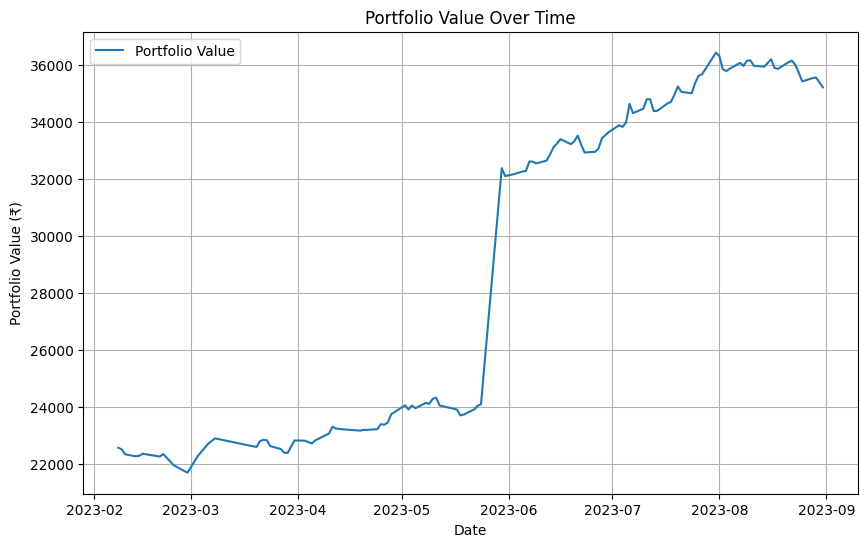


==== Portfolio Performance Metrics ====
Initial Portfolio Value: ₹22559.80
Final Portfolio Value: ₹35201.60
Total Return: 56.04%
Maximum Drawdown: -3.89%


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Function to calculate daily portfolio value
def calculate_daily_portfolio_value(merged_df, portfolio):
    """
    Calculates the daily portfolio value based on the holdings and daily stock prices.

    Args:
        merged_df: DataFrame containing daily stock data
        portfolio: Dictionary of stocks and their purchase prices

    Returns:
        DataFrame with daily portfolio values
    """
    # Create a new DataFrame to store daily portfolio values
    portfolio_stocks = list(portfolio.keys())

    # Filter the merged_df to include only portfolio stocks
    portfolio_df = merged_df[merged_df['STOCK'].isin(portfolio_stocks)].copy()

    # Pivot the data to get daily prices for each stock
    daily_prices = portfolio_df.pivot_table(
        index='Date',
        columns='STOCK',
        values='DEFAULT_LTP',
        aggfunc='last'  # Take the last value if there are multiple values for a day
    ).reset_index()

    # Calculate daily portfolio value (sum of all stock prices)
    for stock in portfolio_stocks:
        if stock in daily_prices.columns:
            daily_prices[f'{stock}_value'] = daily_prices[stock]

    # Sum up the values for all stocks to get total portfolio value
    value_columns = [f'{stock}_value' for stock in portfolio_stocks if f'{stock}_value' in daily_prices.columns]
    daily_prices['Portfolio_Value'] = daily_prices[value_columns].sum(axis=1)

    return daily_prices[['Date', 'Portfolio_Value']]

# Function to calculate cumulative returns
def calculate_cumulative_returns(portfolio_values):
    """
    Calculates cumulative returns for the portfolio.

    Args:
        portfolio_values: DataFrame with 'Date' and 'Portfolio_Value' columns

    Returns:
        DataFrame with cumulative returns
    """
    portfolio_values['Daily_Return'] = portfolio_values['Portfolio_Value'].pct_change()
    portfolio_values['Cumulative_Return'] = (1 + portfolio_values['Daily_Return'].fillna(0)).cumprod() - 1
    return portfolio_values

# Function to calculate maximum drawdown
def calculate_max_drawdown(portfolio_values):
    """
    Calculates the maximum drawdown of the portfolio.

    Args:
        portfolio_values: DataFrame with 'Portfolio_Value' column

    Returns:
        Maximum drawdown as a percentage
    """
    portfolio_values['Peak'] = portfolio_values['Portfolio_Value'].cummax()
    portfolio_values['Drawdown'] = (portfolio_values['Portfolio_Value'] - portfolio_values['Peak']) / portfolio_values['Peak']
    max_drawdown = portfolio_values['Drawdown'].min()
    return max_drawdown * 100  # Convert to percentage

# Function to evaluate portfolio performance
def evaluate_portfolio_performance(merged_df, portfolio, current_date):
    """
    Evaluates the portfolio's performance over time and calculates the final value.

    Args:
        merged_df: DataFrame containing stock data
        portfolio: Dictionary of stocks and their purchase prices
        current_date: Current date for final portfolio value calculation

    Returns:
        Dictionary with performance metrics
    """
    # Step 1: Calculate daily portfolio value
    portfolio_values = calculate_daily_portfolio_value(merged_df, portfolio)

    # Step 2: Filter data up to the current date
    portfolio_values = portfolio_values[portfolio_values['Date'] <= current_date]

    # Step 3: Calculate cumulative returns
    portfolio_values = calculate_cumulative_returns(portfolio_values)

    # Step 4: Calculate maximum drawdown
    max_drawdown = calculate_max_drawdown(portfolio_values)

    # Step 5: Calculate final portfolio value
    final_portfolio_value = portfolio_values['Portfolio_Value'].iloc[-1]

    # Step 6: Calculate initial portfolio value
    initial_portfolio_value = portfolio_values['Portfolio_Value'].iloc[0]

    # Step 7: Calculate total return
    total_return = (final_portfolio_value - initial_portfolio_value) / initial_portfolio_value * 100

    # Step 8: Plot portfolio value over time
    plt.figure(figsize=(10, 6))
    plt.plot(portfolio_values['Date'], portfolio_values['Portfolio_Value'], label='Portfolio Value')
    plt.title('Portfolio Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value (₹)')
    plt.legend()
    plt.grid()
    plt.show()

    # Step 9: Return performance metrics
    return {
        'final_portfolio_value': final_portfolio_value,
        'initial_portfolio_value': initial_portfolio_value,
        'total_return': total_return,
        'max_drawdown': max_drawdown,
        'portfolio_values': portfolio_values
    }

# Integrated execution for Step 9
def execute_step_9(merged_df, portfolio, current_date):
    """
    Executes Step 9 of the trading strategy: Final Portfolio Evaluation

    Args:
        merged_df: DataFrame containing stock data
        portfolio: Dictionary of stocks and their purchase prices
        current_date: Current date for final portfolio value calculation
    """
    print("\n===== Executing Step 9: Final Portfolio Evaluation =====")

    # Ensure portfolio is in the right format
    formatted_portfolio = {}
    if portfolio and isinstance(list(portfolio.values())[0], (int, float)):
        # Convert simple portfolio {stock: price} to {stock: {price: price, shares: 1}}
        for stock, price in portfolio.items():
            formatted_portfolio[stock] = {'price': price, 'shares': 1, 'value': price}
    else:
        formatted_portfolio = portfolio

    # Evaluate portfolio performance
    performance_metrics = evaluate_portfolio_performance(merged_df, formatted_portfolio, current_date)

    if performance_metrics:
        # Print performance metrics
        print("\n==== Portfolio Performance Metrics ====")
        print(f"Initial Portfolio Value: ₹{performance_metrics['initial_portfolio_value']:.2f}")
        print(f"Final Portfolio Value: ₹{performance_metrics['final_portfolio_value']:.2f}")
        print(f"Total Return: {performance_metrics['total_return']:.2f}%")
        print(f"Maximum Drawdown: {performance_metrics['max_drawdown']:.2f}%")

    return performance_metrics

# Example usage
if __name__ == "__main__":
    # Define variables
    current_date = datetime(2023, 8, 31)  # Replace with the current date

    # Run Step 9 using existing portfolio
    performance_results = execute_step_9(merged_df, portfolio, current_date)